<a href="https://colab.research.google.com/github/NyasaShaiju/Task3-Linear_Regression/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-fa2b9b30776e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-fa2b9b30776e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

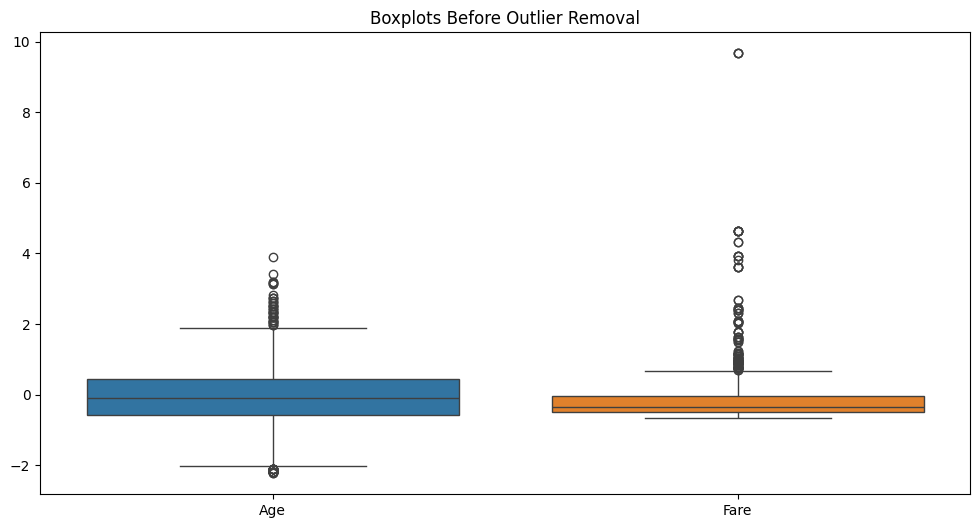

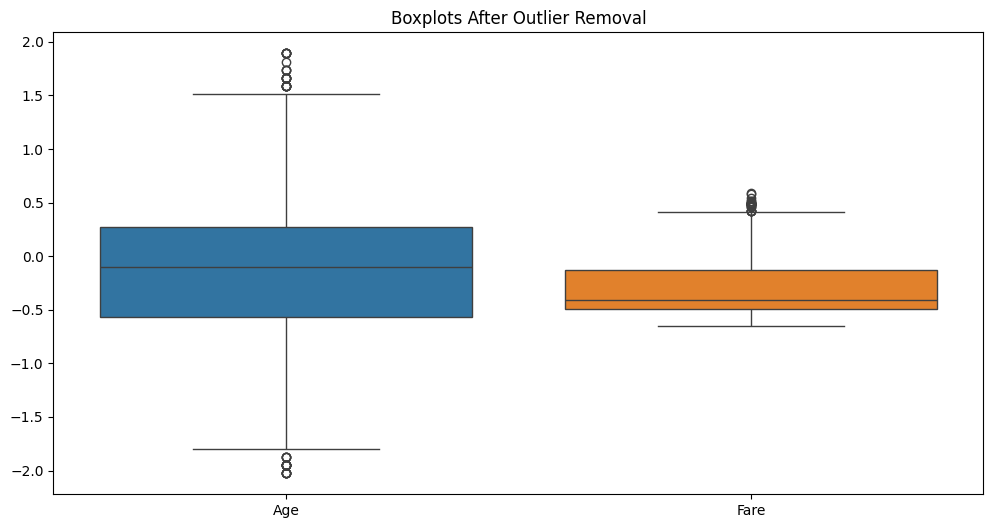

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4            373450 -0.486337       False        True  
5            330877 -0

In [1]:
#Task1-data cleaning and preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df=pd.read_csv("/content/Titanic-Dataset.csv");

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots Before Outlier Removal")
plt.show()

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots After Outlier Removal")
plt.show()

print(df.head())

In [ ]:
#Task2-Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Summary statistics")
df.describe()

Summary statistics


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,447.883008,0.334262,2.512535,0.681058,-0.098537,0.413649,0.317549,-0.302242
std,259.549777,0.472061,0.715818,0.466391,0.769449,0.855001,0.784792,0.266674
min,1.000000,0.000000,1.000000,0.000000,-2.025883,0.000000,0.000000,-0.648422
25%,220.250000,0.000000,2.000000,0.000000,-0.565736,0.000000,0.000000,-0.489568
50%,447.500000,0.000000,3.000000,1.000000,-0.104637,0.000000,0.000000,-0.411839
75%,673.500000,1.000000,3.000000,1.000000,0.270006,1.000000,0.000000,-0.126366
max,891.000000,1.000000,3.000000,1.000000,1.893459,5.000000,6.000000,0.587429


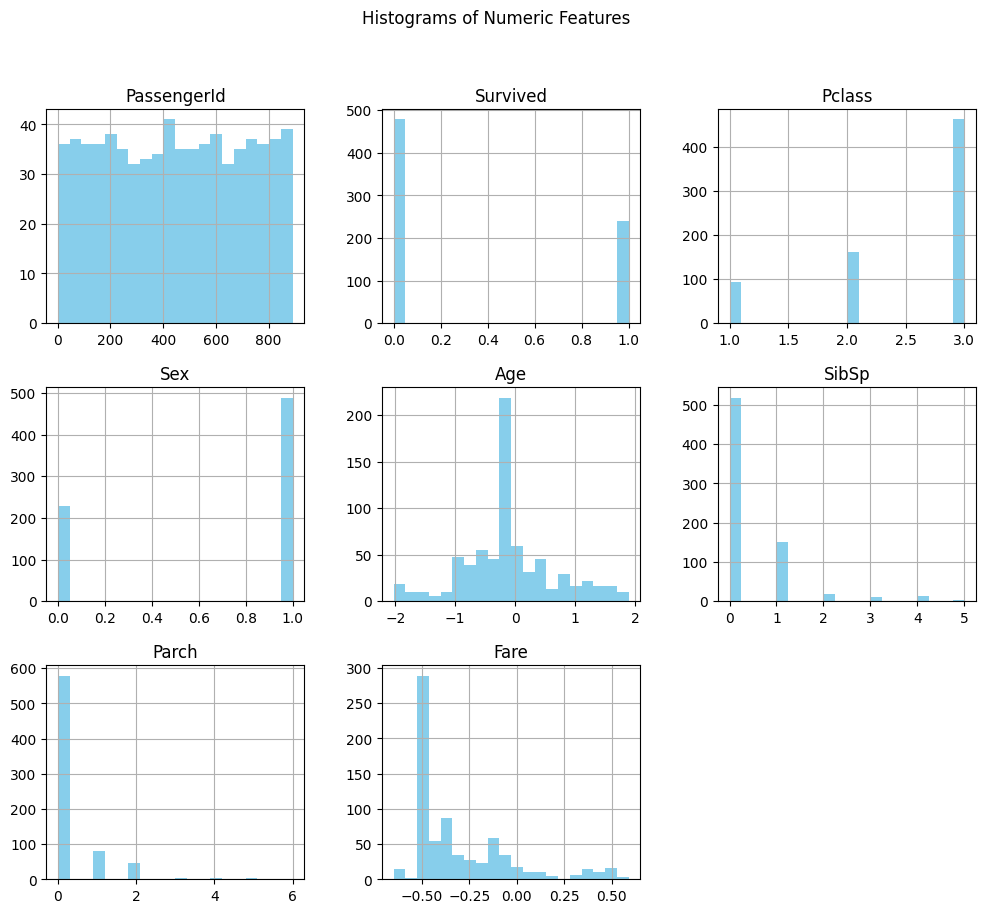

In [3]:
df.hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle("Histograms of Numeric Features")
plt.show()

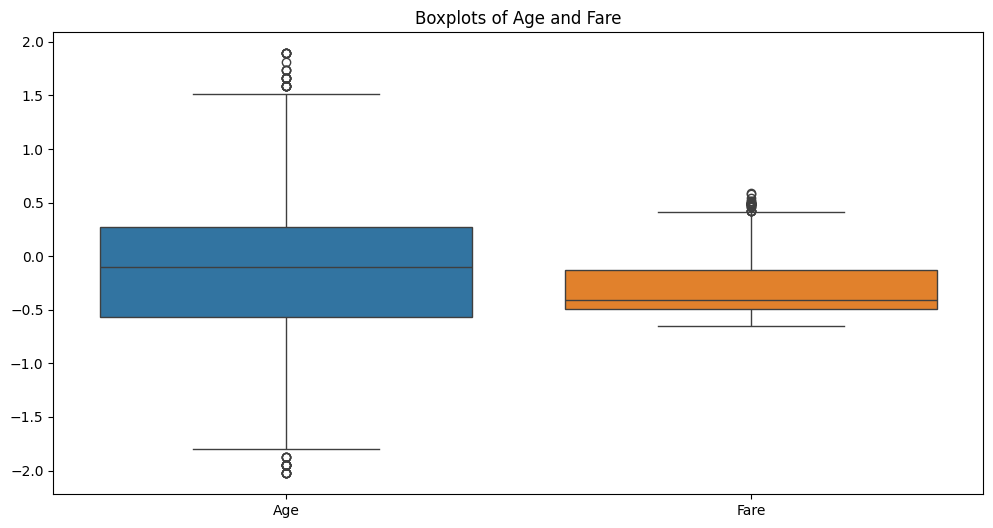

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots of Age and Fare")
plt.show()

Correlation Matrix


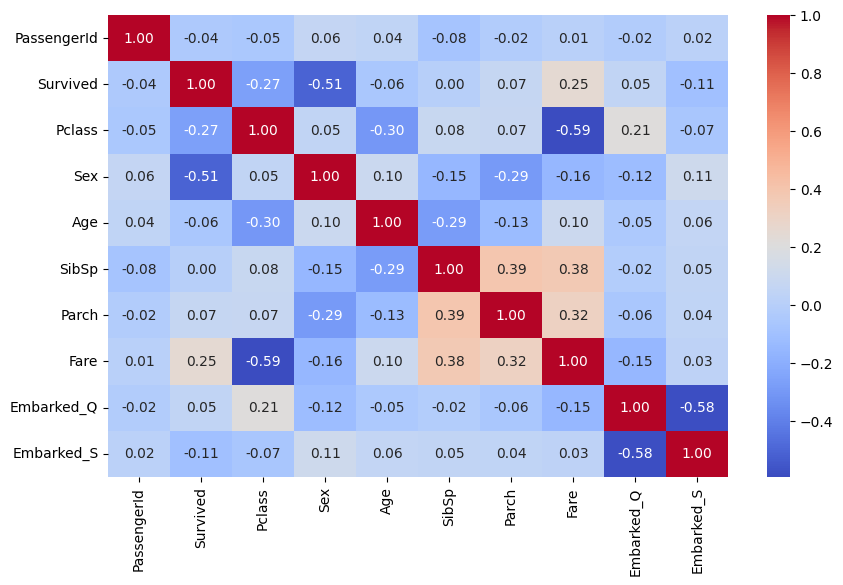

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
print("Correlation Matrix")
plt.show()

Pairplot


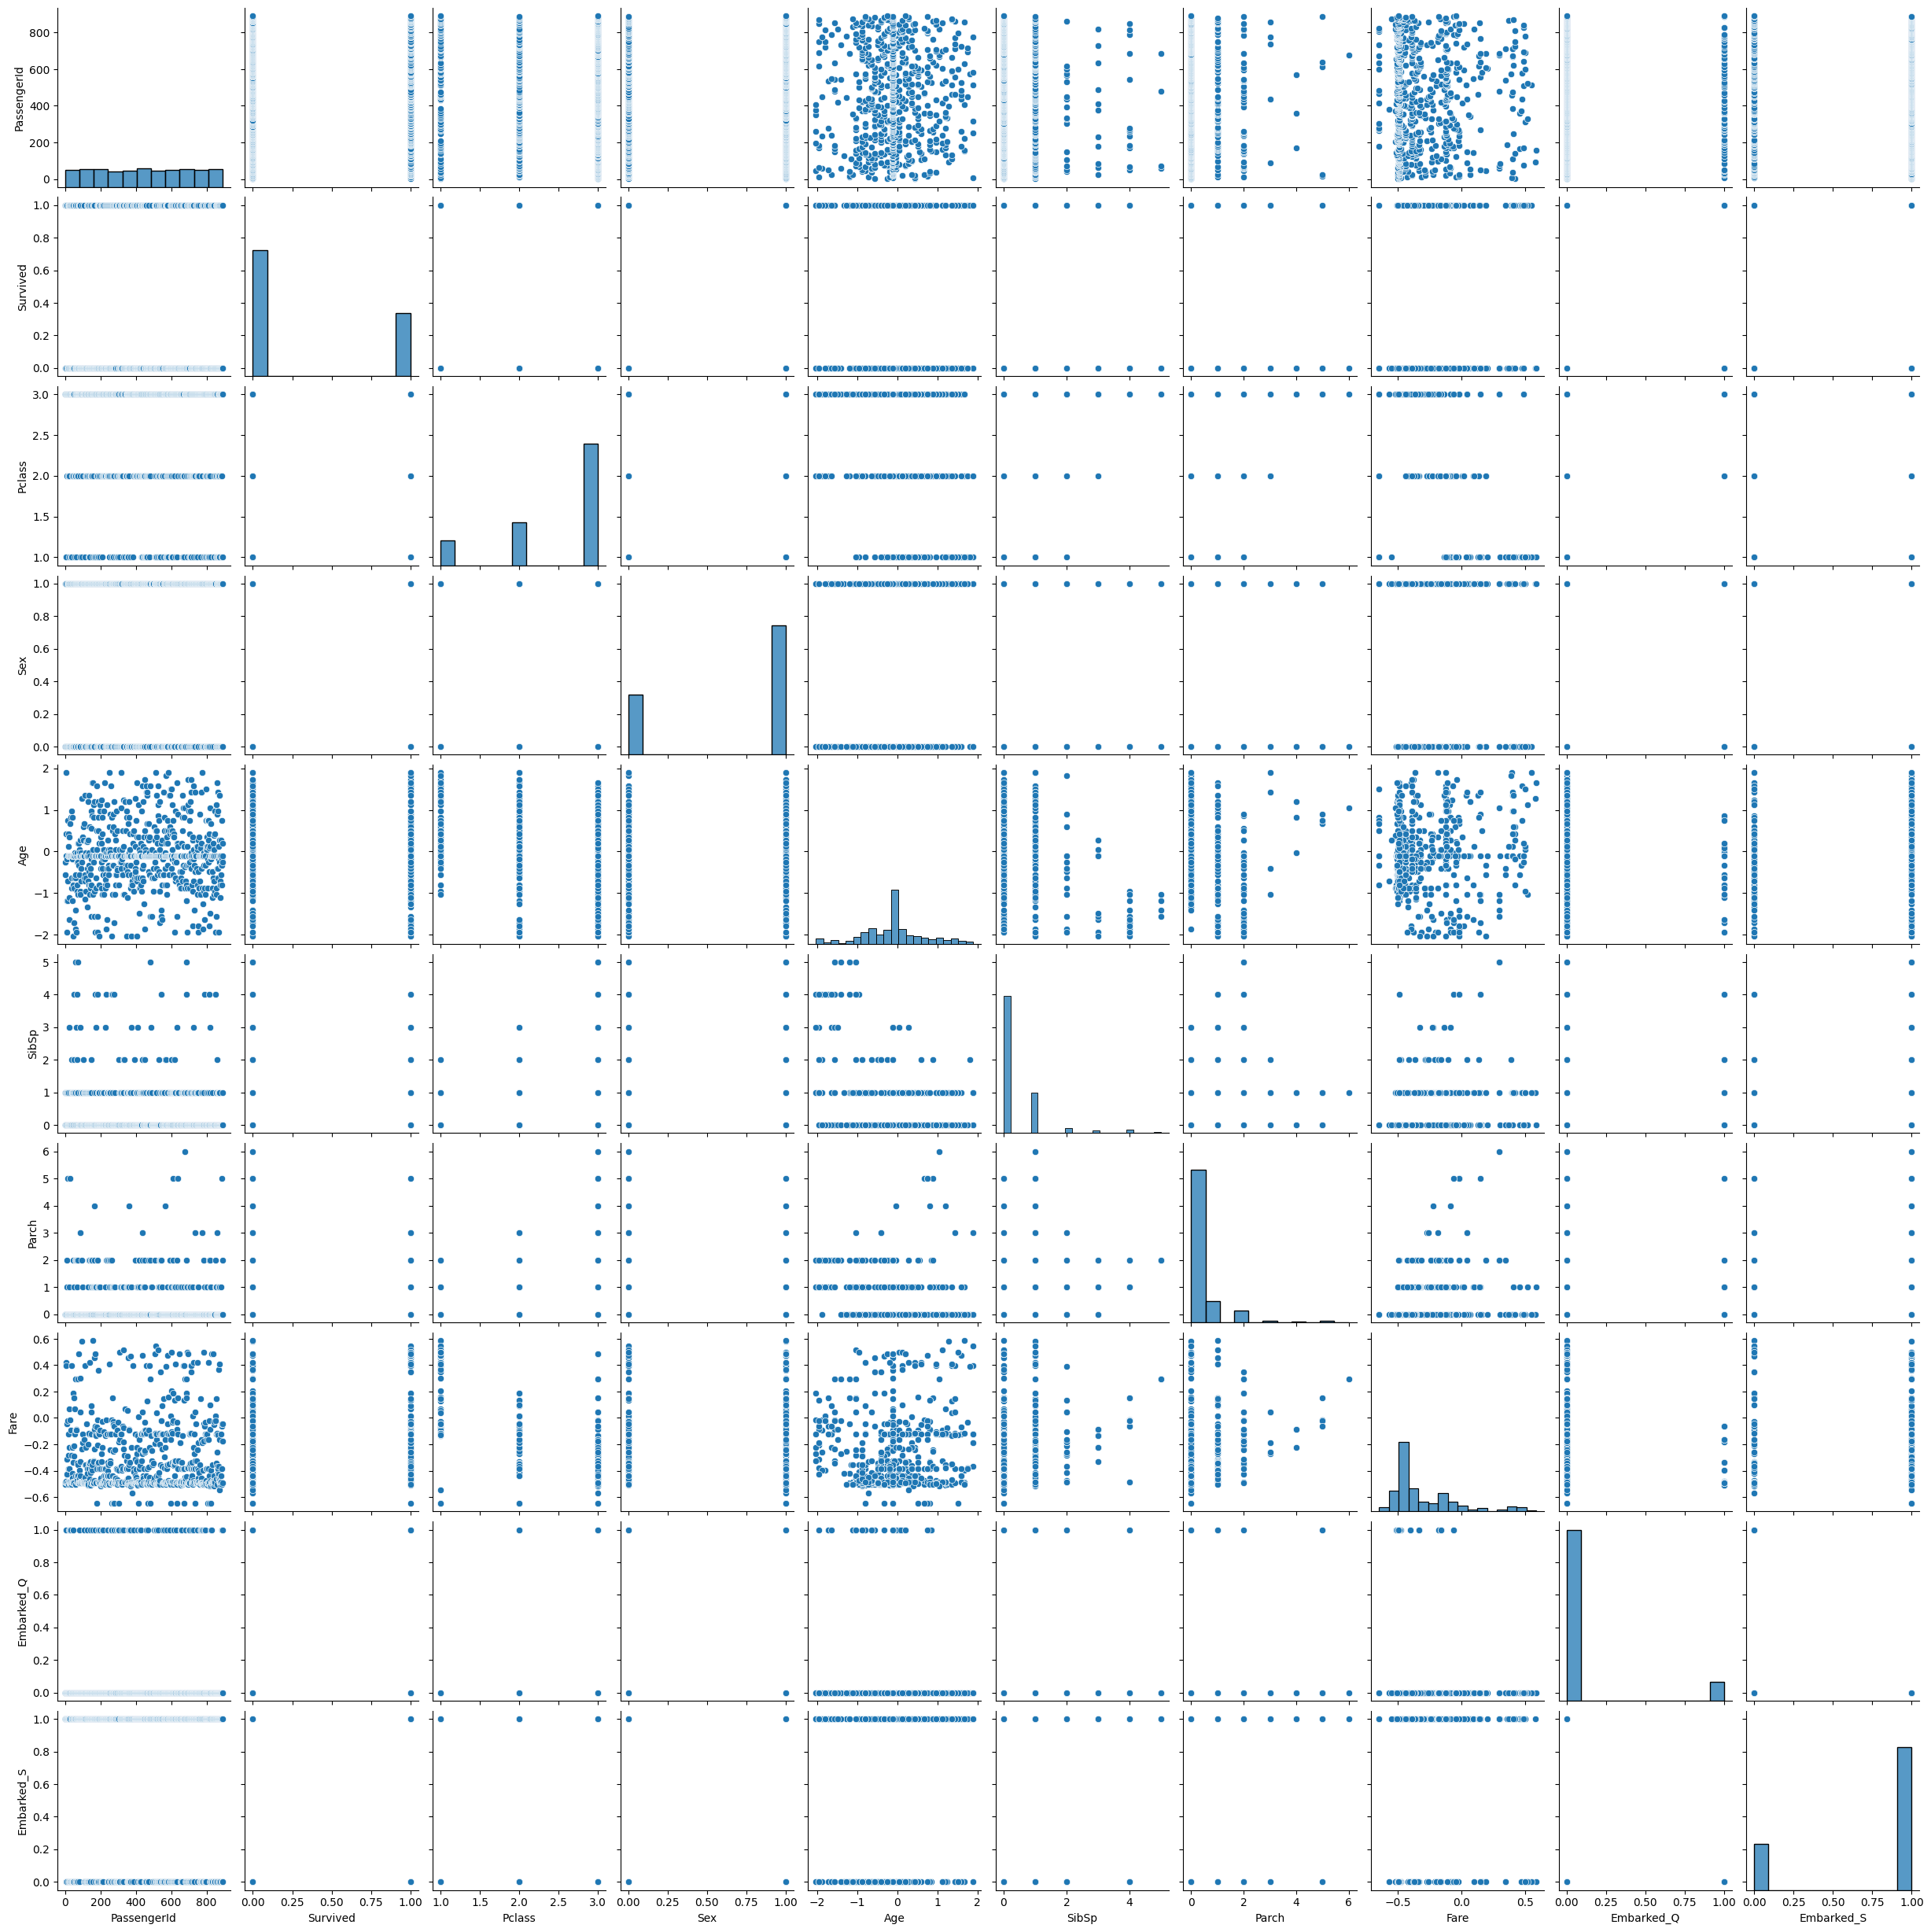

In [6]:
print("Pairplot")
sns.pairplot(df)

Countplot


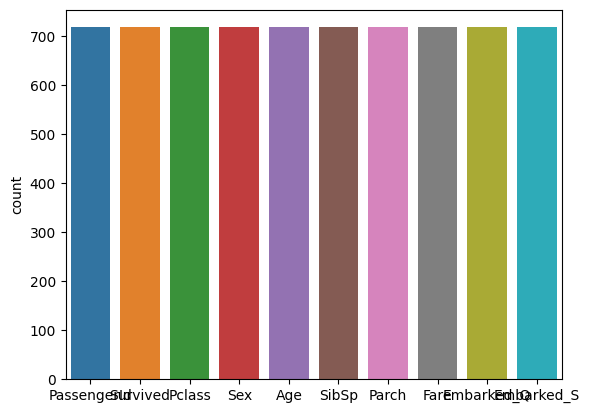

In [7]:
sns.countplot(df)
print("Countplot")

In [8]:
fig = px.scatter(df, x="Age", y="Fare", color="Survived", title="🌀 Age vs Fare (Colored by Survival)")
fig.show()


Mean Absolute Error (MAE): 0.20747695312294218
Mean Squared Error (MSE): 0.07127798036716403
R-squared (R²): 0.010569358297538134


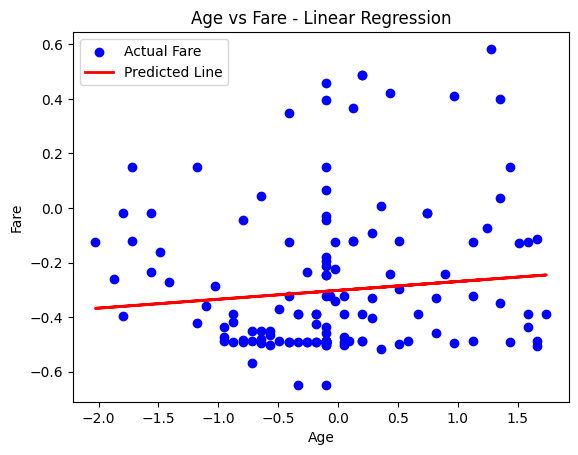

Intercept (b0): -0.3018701478261876
Slope (b1): 0.03252092660310961


In [11]:
#Task3-LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['Age']]
y = df['Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

plt.scatter(X_test, y_test, color='blue', label="Actual Fare")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Line")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare - Linear Regression")
plt.legend()
plt.show()

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])
